# Assignment 1: Numerical Differentiation
## PHYS481 - Computational Physics II
### Max Stronge (30064749)


## Introduction
In this assignment, numerical differentiation techniques are explored in the context of orbital mechanics. Data was collected from the THEMIS-D satellite (publicly availabe, see https://sscweb.gsfc.nasa.gov/users_guide/Appendix_C.shtml) in the GEO coordinate system. The data was collected on July 31, 2023, and the orbit is plotted in the XY and XZ planes, as well as a function of time. The Earth is also plotted in the XY and XZ planes for reference, as well as a 3D trajectory plot.

Conservation of energy was examined over the 24hr of recorded data for the THEMIS-D satellite. Simple models for kinetic and potential energies were used (with a more advanced potential model used for the final question).

The numerical differentiation techniques used were of the finite difference type - a forward finite difference method was used initially, and then was compared to the results of 3-point, 5-point, and 7-point methods. The degree of accuracy of the approximation (as well as the degree of noise amplifaction that occurs) was explored as more points were taken into consideration 

***

## Question 1
Plot the orbits for THEMIS-D, during the day 2023/07/31, both as a function of time (in hours) and as position in the XY and XZ planes. For the position, use units of Earth radii ($R_E$). Plot the Earth on the XY and YZ plots.


In [41]:
# standard package import

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


# definition of constants:

# radius of the Earth (source: https://nssdc.gsfc.nasa.gov/planetary/factsheet/earthfact.html))
earth_radius = 6378.137 #km 

# gravitational constant
gravity_const = 6.674e-11 #m^3 kg^-1 s^-2

# convert gravitational constant to km^3 kg^-1 hr^-2
gravity_const += (1e-9 * 3600**2)

# mass of the Earth
earth_mass = 5.972e24 #kg

# define constant h timestep for finite difference method
h = 1/60.0 #hours (1 minute)

# satellite name
satellite_name = 'themisd'

# source data path
data_path = r"C:\Users\maxst\sciencia\F23\PHYS481\A1\themisd_NASA_datadump.txt"


In [42]:
def parse_date(date_string):
    '''
    Convert date from hh:mm:ss to hours as a float. Seconds are always 0 so they are dropped. Returns t in hours.
    '''
    # split the date string by :
    date_list = date_string.split(':')
    
    # store the hours as a float
    hours = float(date_list[0])

    # convert minutes to hours and add to hours

    hours += float(date_list[1])/60

    return hours



def validate_data_row(data_row):
    '''
    Check that given row is valid data. Returns true or false.
    '''
    # check the first 8 characters to see if the string exactly matches the right date ("2023 212") - if the string starts with anything else, return false
    if data_row[0:8] == "2023 212":
        return True
    else:
        return False
    


def parse_data_row(data_row):
    '''
    Parse a single line of data from the NASA data dump, returning time and position data
    '''
    # split the data row into a list of strings
    data_list = data_row.split()
    
    # extract the relevant time data (will be the 3rd element of the split string list, after yyyy ddd)
    time = data_list[2]

    # format the time data into hours
    time = parse_date(time)
  

    # extract the position data (will be the 4th, 5th, and 6th elements of the split string list, after yyyy ddd and time)
    x_pos, y_pos, z_pos = data_list[3:6]


    # convert all data from strings to floats
    time = float(time)
    x_pos = float(x_pos)
    y_pos = float(y_pos)
    z_pos = float(z_pos)

    
    # return the data as a tuple
    return (time, x_pos, y_pos, z_pos)

def read_orbit_data(filename):
    '''
    Read and parse the orbit data extract from NASA. Return numpy arrays for time and x,y,z positions for use in plotting functions.filename parameter should be full path to data file.
    '''

    # define empty arrays for time and position data (floats)
    t_array = np.array([])
    x_array = np.array([])
    y_array = np.array([])
    z_array = np.array([])

    index = 0

    # read all lines into data string
    with open(filename, 'r') as f:
        for line in f:
            
            # first validate that this is a data row
            if validate_data_row(line):

                # if it is, extract the relevant data
                t,x,y,z = parse_data_row(line)

                # add t, x, y, and z as new elements at the end of their respective arrays
                t_array = np.append(t_array, t)
                x_array = np.append(x_array, x)
                y_array = np.append(y_array, y)
                z_array = np.append(z_array, z)


    return t_array, x_array, y_array, z_array


def convert_to_earth_radii(x_series, y_series, z_series):
    '''
    Convert x, y, and z positions from km to earth radii
    '''

    # convert x, y, and z to earth radii
    x_series_er = x_series/earth_radius
    y_series_er = y_series/earth_radius
    z_series_er = z_series/earth_radius

    return x_series_er, y_series_er, z_series_er



# define the data arrays from the NASA data file  
t_series, x_series_km, y_series_km, z_series_km = read_orbit_data(data_path)

# convert x,y, and z to earth radii
x_series_er, y_series_er, z_series_er = convert_to_earth_radii(x_series_km, y_series_km, z_series_km)



In [51]:



def distance_from_earth(x_series, y_series, z_series, t_series):
    '''
    Calculate the distance of the satellite from the center of the earth at each time step. Returns an array of distances in km.
    '''
    # initialize empty array for distance data
    r_series = np.array([])

    # loop through each time step and calculate distance from earth
    for i in range(len(t_series)):
        r = np.sqrt((x_series[i])**2 + (y_series[i])**2 + (z_series[i])**2)
        r_series = np.append(r_series, r)


    return r_series



def orbit_plots(t_series, x_series, y_series, z_series, r_series):
    '''
    Create a 2x2 grid of plots showing the orbit of the satellite in the xy, xz, and yz planes, as well as the distance from earth as a function of time. Units of Earth Radii are used for the x, y, and z axes.
    '''
 
    # set up plot with 4 subplots, 2x2 grid. Each of the plots should have minor gridlines on

    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(10,10))

    # plot the orbit in the xy plane
    ax1.plot(x_series, y_series)
    ax1.set_xlabel('X (Earth radii)')
    ax1.set_ylabel('Y (Earth radii)')
    ax1.set_title('Orbit of THEMIS-D satellite in xy plane')
    ax1.minorticks_on()

    # add marker for the Earth at the origin
    ax1.scatter(0,0, marker='o', s=100, color='blue', label='Earth (not to scale)')


    # plot the orbit in the xz plane

    ax2.plot(x_series, z_series)
    ax2.set_xlabel('X (Earth radii)')
    ax2.set_ylabel('Z (Earth radii)')
    ax2.set_title('Orbit of THEMIS-D satellite in xz plane')
    ax2.minorticks_on()

    # add marker for the Earth at the origin
    ax2.scatter(0,0, marker='o', s=100, color='blue', label='Earth (not to scale)')


    # plot the orbit in the yz plane

    ax3.plot(y_series, z_series)
    ax3.set_xlabel('Y (Earth radii)')
    ax3.set_ylabel('Z (Earth radii)')
    ax3.set_title('Orbit of THEMIS-D satellite in yz plane')
    ax3.minorticks_on()

    # add marker for the Earth at the origin
    ax3.scatter(0,0, marker='o', s=100, color='blue', label='Earth (not to scale)')

    # plot the distance from earth as a function of time

    ax4.plot(t_series, r_series)
    ax4.set_xlabel('Time (hours)')
    ax4.set_ylabel('Distance from Earth (Earth radii)')
    ax4.set_title('Distance from Earth vs time')
    ax4.grid(True, which='both')
    ax4.minorticks_on()

    plt.tight_layout()
    
    plt.show()

def plot_orbit_3d(x_series_er, y_series_er, z_series_er):
    '''
    Create a 3d plot of the orbit of the satellite. Units of Earth Radii are used for the x, y, and z axes.
    '''
    
    fig = plt.figure(figsize=(14,10))
    ax = fig.add_subplot(projection='3d')

    ax.plot(x_series_er, y_series_er, z_series_er)
    ax.set_xlabel('X (Earth radii)')
    ax.set_ylabel('Y (Earth radii)')
    ax.set_zlabel('Z (Earth radii)', labelpad=-33)
    ax.set_title('Orbit of THEMIS-D satellite')

    # add a large blue marker at the origin to represent the Earth
    ax.scatter(0,0,0, marker='o', s=600, color='blue', label='Earth (not to scale)')

    ax.legend()
    plt.show()



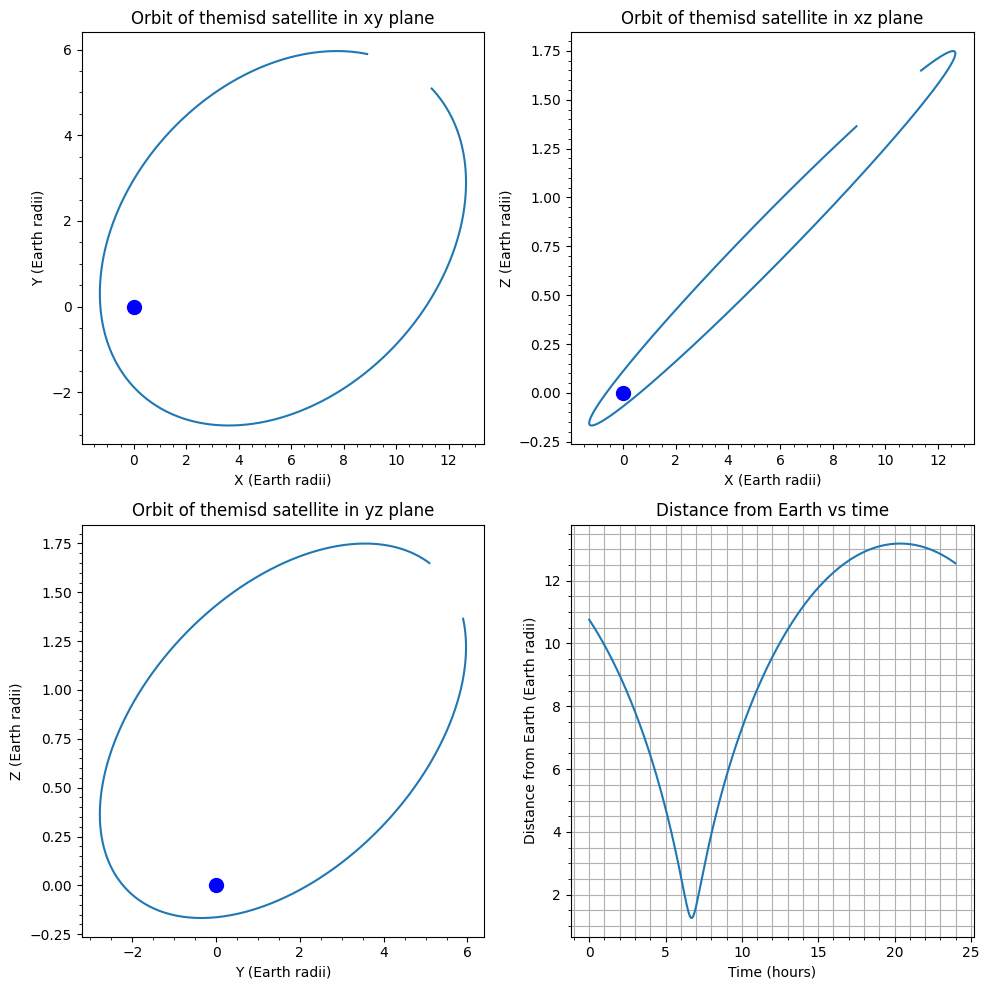

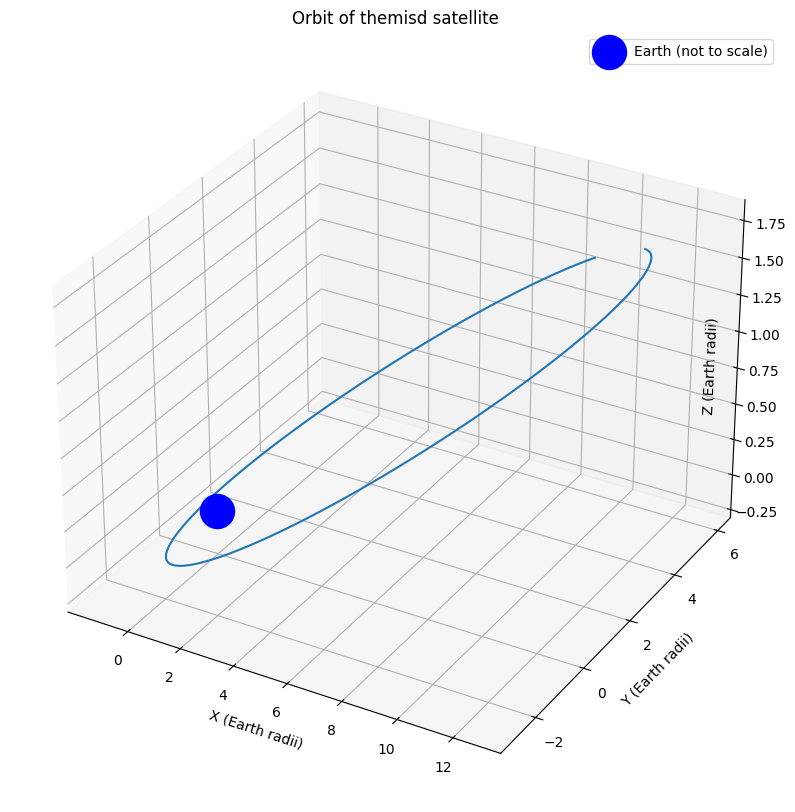

In [44]:
# use functions to generate plots

r_series_er = distance_from_earth(x_series_er, y_series_er, z_series_er, t_series)

orbit_plots(t_series, x_series_er, y_series_er, z_series_er, r_series_er)

plot_orbit_3d(x_series_er, y_series_er, z_series_er)


It can be seen from the fourth graph (*Distance from Earth vs time*) that the perigee occurs at $t \approx 6.75$ hours at a distance of $r \approx 1.25 R_E$. The apogee occurs at approximately $t=20$ hours, at a distance of $r\approx 13.25 R_E$. The data points sampled do not cover a full period, but the satellite appears to have an orbital period of slightly more than one day.

Generating a 3d plot of the position of the satellite (which was recently made possible in the base matplotlib library) demonstrates that the trajectory of the satellite traces an ellipse, which is a plausible orbit for any orbiting body. We can note that the *eccentricity* $e$ of the ellipse is greater than zero (as the ellipse deviates from a perfect circle) but less than 1, as this would result in a parabolic or hyperbolic orbit, which would not be ideal for a satellite that we might like to see again. 



-------------------


## Question 2


A **finite difference scheme** is a simple method of numerical differentiation. We use a **forward finite difference** scheme for this investigation, which works as follows:

For a function $f(x)$, we can estimate the slope of the function at some point $x_j$ using the line drawn between the points $(x,f(x))$ and $(x_{j+1},f(x_{j+1}))$:

$$f'(x_j)=\frac{f(x_{j+1})-f(x_j)}{x_{j+1}-x_j}$$



In [45]:
def finite_difference(r_series, t_series):
    '''
    Calculate the finite difference of the distance from earth as a function of time. 
    '''
    # initialize empty array for finite difference data
    fd_series = np.array([])

    # loop through each time step
    for i in range(len(t_series)):

        # skip the first and last time steps as they have no neighbors to use for finite difference
        if i == 0 or i == len(t_series)-1:
            continue
        
        # Apply finite difference algorithm
        fd = (r_series[i+1] - r_series[i])/(t_series[i+1] - t_series[i])
        fd_series = np.append(fd_series, fd)

    return fd_series


For the potential energy we use a simple $1/r$ gravitational potential for the Earth. We can then calculate the potential energy per unit mass at some point $x_j,y_j, z_j$ using the following formula:

$$U(x_j)=-\frac{GM}{r}=-\frac{GM}{\sqrt{x_j^2+y_j^2+z_j^2}}$$

where $M$ is the mass of the Earth, $m$ is the mass of the satellite, and $r$ is the distance between the satellite and the Earth.

Kinetic energy per unit mass is given by the formula:

$$K(v)=\frac{1}{2}v^2$$

where $v$ is the velocity of the satellite, calculated from the position data using a finite difference method of some type. For this question we use the forward finite difference as described above.

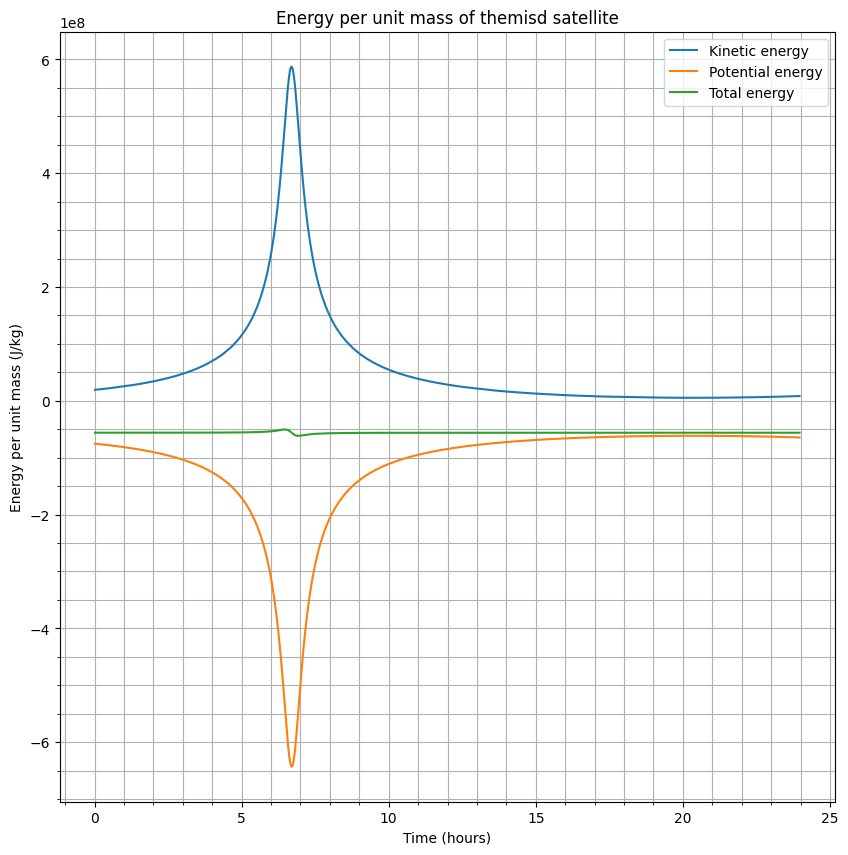

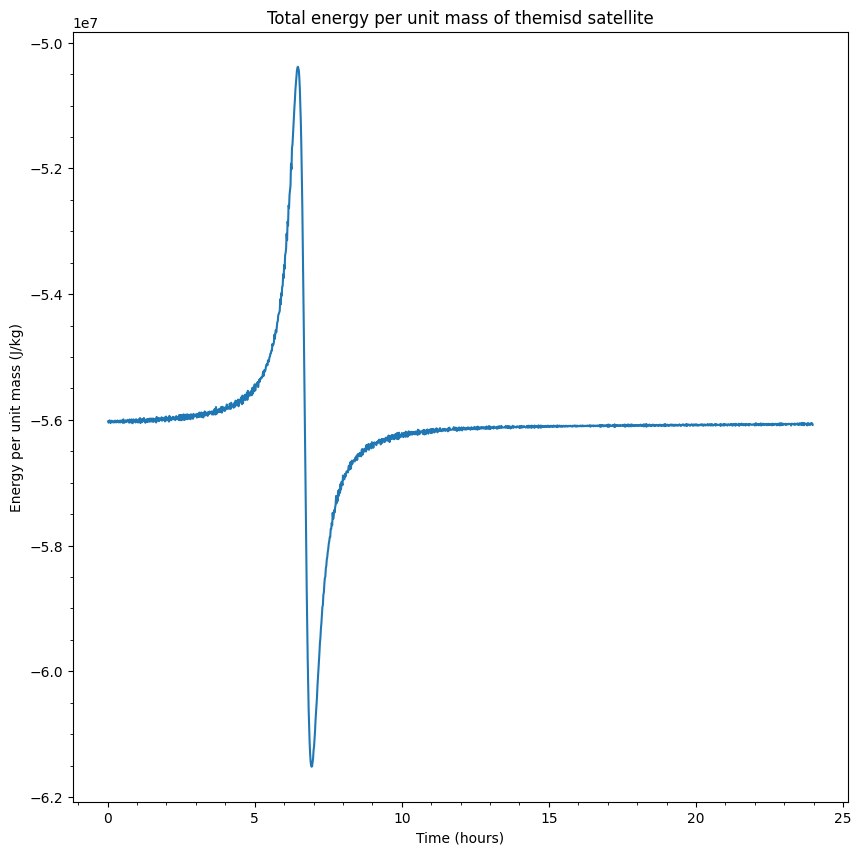

In [46]:



def calculate_potential_energy(x_series, y_series, z_series):
    '''
    Calculate the potential energy per unit mass of the satellite as a function of time, given series of x, y and z positions. Returns an array of potential energy values in J/kg.
    '''
    # Calculate the radial distance of the satellite from the center of the earth (i.e. the origin)
    r_series = np.sqrt(x_series**2 + y_series**2 + z_series**2)

    # Calculate the potential energy per unit mass
    potential_energy =  (-1*gravity_const * earth_mass/r_series)

    return potential_energy

def calculate_kinetic_energy(v_series):
    '''
    Calculate the kinetic energy per unit mass of the satellite as a function of time, given a series of velocity data. Returns an array of kinetic energy values in J/kg.
    '''
    # Calculate the kinetic energy per unit mass
    kinetic_energy = 0.5*(v_series**2)

    return kinetic_energy


def q2_plots(x_series, y_series, z_series, time_data):
    '''
    Create the plots required for question 2: kinetic and potential energy per unit mass.
    '''
    # Calculate the velocity of the satellite in kilometers per hour using forward finite difference method
    v_series = np.sqrt(finite_difference(x_series,time_data)**2 + finite_difference(y_series,time_data)**2 + finite_difference(z_series,time_data)**2)

    # calculate the kinetic energy per unit mass
    kinetic_energy = calculate_kinetic_energy(v_series)

    # calculate the potential energy per unit mass
    potential_energy = calculate_potential_energy(x_series, y_series, z_series)

    # resize the potential energy array to match the kinetic energy array
    potential_energy = potential_energy[1:-1]

    # calculate the total energy per unit mass
    total_energy = kinetic_energy + potential_energy

    # resize the time data array to match the energy arrays
    t_series = time_data[1:-1]

   # plot the kinetic, potential, and total energy per unit mass as a function of time on one plot
    fig, ax = plt.subplots(figsize=(10,10))
    ax.plot(t_series, kinetic_energy, label='Kinetic energy')
    ax.plot(t_series, potential_energy, label='Potential energy')
    ax.plot(t_series, total_energy, label='Total energy')

    ax.set_xlabel('Time (hours)')
    ax.set_ylabel('Energy per unit mass (J/kg)')
    ax.set_title('Energy per unit mass of THEMIS-D satellite')
    ax.legend()
    ax.grid(True, which='both')
    ax.minorticks_on()
    plt.show()
    
    # plot the total energy as a function of time on its own plot
    fig, ax = plt.subplots(figsize=(10,10))
    ax.plot(t_series, total_energy, label='Total energy')
    ax.set_xlabel('Time (hours)')
    ax.set_ylabel('Energy per unit mass (J/kg)')
    ax.set_title('Total energy per unit mass of THEMIS-D satellite')
    ax.minorticks_on()

    plt.show()

# plot the kinetic, potential, and total energy per unit mass as a function of time on one plot
q2_plots(x_series_km, y_series_km, z_series_km, t_series)


Above are the plots of kinetic, potential, and total energy of the satellite vs time, with kinetic energy approximated using a forward finite difference method. The total energy is plotted separately on the following chart for clarity. 

Because gravity is a conservative force, we expect the total energy of the satellite to be conserved. This is not the case, as the total energy of the satellite experiences a small discontinuity at the **perigee** (maximum kinetic energy, minimum potential energy). Total energy should remain constant, and the potential energy is dependent only on the position, which has been used directly from the source without loss of accuracy. The discrepancy in energy must, therefore, emerge in the numerical differentiation of the position data. This makes sense, as we have only used a first order approximation - clearly energy is *nearly* conserved with this approximation, but an improvement in the accuracy should result in a flatter total energy graph. 
Higher-order approximations are discussed in the next question.

---------

## Question 3

 Repeat question 2 using 3-point, 5-point and 7-point central finite difference estimators to compute the kinetic energy.

The 3-point central finite difference takes the average of the forward difference (as above) and the backward finite difference, as follows:

$$\begin{align} 

f'(x_n)&=\frac{1}{2} \frac{f(x_{n+1})-f(x_{n})}{h} + \frac{1}{2} \frac{f(x_n)-f(x_{n-1})}{h} \\
f'(x_n)&=\frac{f(x_{n+1})-f(x_{n-1})}{2h}





\end{align}
$$


Here, our our step size $h$ between each successive measurement in time is one minute, or $1/60$ hours.


Further gains in accuracy may be made by taking an average over a greater number of points. For example, a 5-point central finite difference scheme is more accurate than the 3-point scheme outlined above, and is given by:

$$f'(t_n) \approx \frac{f(t_{n-2}) - 8f(t_{n-1}) + 8f(t_{n+1}) - f(t_{n+2})}{12h}$$

Further, a 7-point scheme takes an additional 2 points into account:


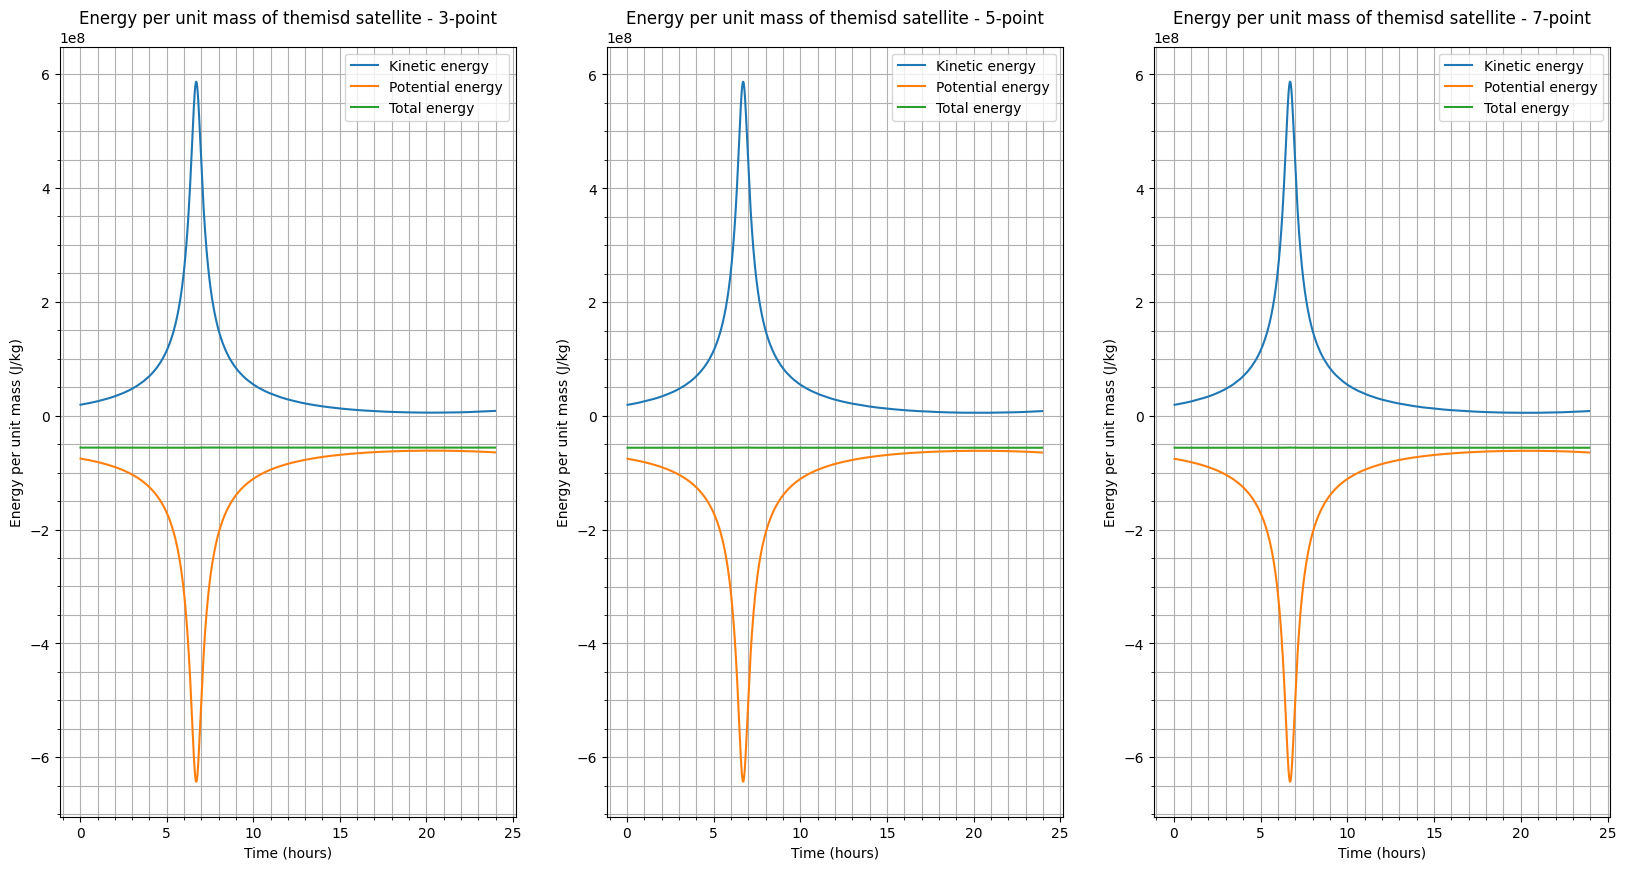

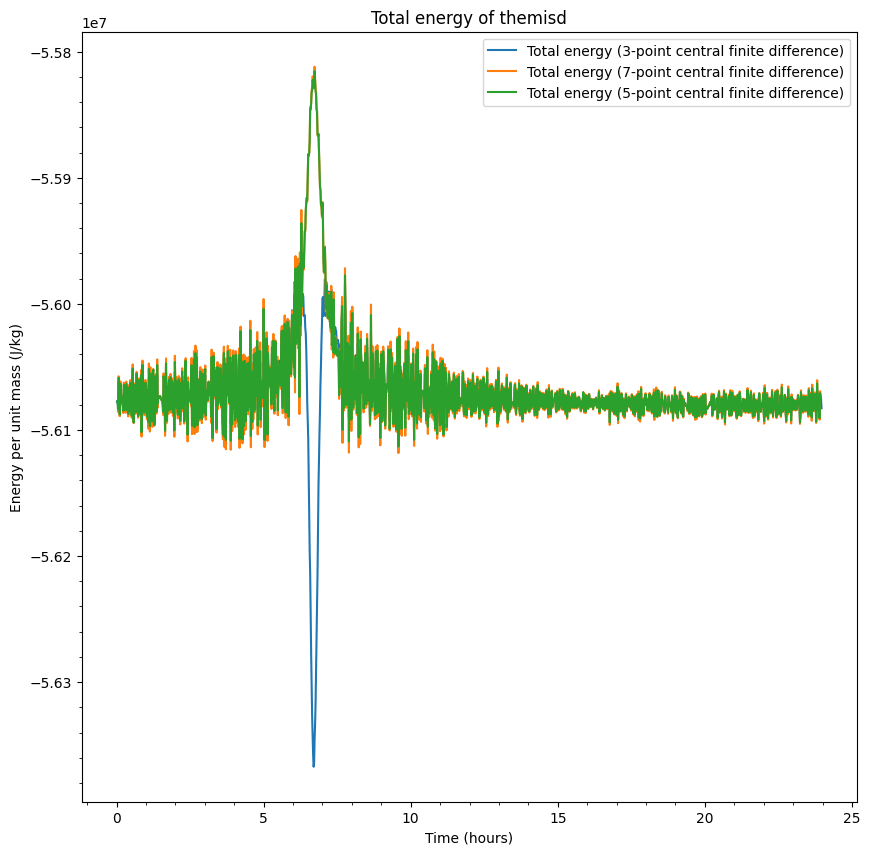

In [35]:
def finite_central_difference_three(r_series, t_series, h_step):
    '''
    Calculate the 3-point central finite difference of the input r_series as a function of t_series, with time step h. Returns an array of finite difference values (approximated derivatives). 
    '''
    # initialize empty array for central finite difference data
    cfd_series = np.array([])

    # loop through each time step
    for n in range(len(t_series)):

        # skip the first and last time steps as they have no neighbors
        if n == 0 or n == len(t_series)-1:
            continue

        # Apply 3-point central difference algorithm
        cfd = (r_series[n+1] - r_series[n-1])/(2*h_step)
        cfd_series = np.append(cfd_series, cfd)

    return cfd_series


def finite_central_difference_five(r_series, t_series, h_step):
    '''
    Calculate the 5-point central finite difference of the input r_series as a function of t_series. Returns an array of finite difference values (approximated derivatives). 
    '''

    # initialize empty array for central finite difference data
    cfd_series = np.array([])

    # loop through each time step
    for n in range(len(t_series)):

        # exclude the endpoints as they have no neighbors, and the second and second-last points as they have only one neighbor
        if n == 0 or n == 1 or n == len(t_series)-1 or n == len(t_series)-2:
            continue

        # Apply 5-point central difference algorithm
        cfd = (r_series[n-2] - 8*r_series[n-1] + 8*r_series[n+1] - r_series[n+2])/(12*h_step)
        cfd_series = np.append(cfd_series, cfd)

    return cfd_series

def finite_central_difference_seven(r_series, t_series, h_step):
    '''
    Calculate the 7-point central finite difference of the input r_series as a function of t_series. Returns an array of finite difference values (approximated derivatives). 
    
    '''

    # initialize empty array for central finite difference data
    cfd_series = np.array([])

    # loop through each time step
    for n in range(len(t_series)):

        # exclude the endpoints as they have no neighbors, and the second and second-last points as they have only one neighbor, and the third and third-last points as they have only two neighbors
        if n == 0 or n == 1 or n==2 or n == len(t_series)-1 or n == len(t_series)-2 or n == len(t_series)-3:
            continue

        # Apply 7-point central difference algorithm
        cfd = (1/h_step)*((-r_series[n-3]/60)+ (3*r_series[n-2]/20) - (3*r_series[n-1]/4) + (3*r_series[n+1]/4) - (3*r_series[n+2]/20) + (r_series[n+3]/60))
        cfd_series = np.append(cfd_series, cfd)

    return cfd_series

        
def q3_plots(x_series,y_series,z_series,t_series):
    '''
    Create the plots required for question 3: 3,5, and 7 point central finite difference approximations of the KE
    '''


    # Calculate the velocity of the satellite in kilometers per hour using 3-point central finite difference method
    v_series_3 = np.sqrt(finite_central_difference_three(x_series,t_series,h)**2 + finite_central_difference_three(y_series,t_series,h)**2 + finite_central_difference_three(z_series,t_series,h)**2)


    # Calculate the kinetic energy per unit mass
    kinetic_energy_3 = calculate_kinetic_energy(v_series_3)

    # calculate the potential energy per unit mass
    potential_energy = calculate_potential_energy(x_series, y_series, z_series)

    # resize the potential energy arrays to match the kinetic energy arrays
    potential_energy_3, potential_energy_5, potential_energy_7 = potential_energy[1:-1], potential_energy[2:-2], potential_energy[3:-3]

    # calculate the total energy per unit mass 
    total_energy_3 = kinetic_energy_3 + potential_energy_3

    # Calculate the velocity of the satellite in kilometers per hour using 5-point central finite difference method
    v_series_5 = np.sqrt(finite_central_difference_five(x_series,t_series,h)**2 + finite_central_difference_five(y_series,t_series,h)**2 + finite_central_difference_five(z_series,t_series,h)**2)

    # Calculate the kinetic energy per unit mass
    kinetic_energy_5 = calculate_kinetic_energy(v_series_5)


    # calculate the total energy per unit mass
    total_energy_5 = kinetic_energy_5 + potential_energy_5

    # Calculate the velocity of the satellite in kilometers per hour using 7-point central finite difference method
    v_series_7 = np.sqrt(finite_central_difference_seven(x_series,t_series,h)**2 + finite_central_difference_seven(y_series,t_series,h)**2 + finite_central_difference_seven(z_series,t_series,h)**2)


    # Calculate the kinetic energy per unit mass
    kinetic_energy_7 = calculate_kinetic_energy(v_series_7)

    # calculate the total energy per unit mass
    total_energy_7 = kinetic_energy_7 + potential_energy_7


    # plot three subplots, each one plotting the kinetic, potential, and total energy per unit mass as a function of time on one plot, one for the 3-point central finite difference, one for the 5-point central finite difference, and one for the 7-point central finite difference
    
    fig, ((ax1, ax2, ax3)) = plt.subplots(1,3, figsize=(20,10))

    # first plot: 3-point central finite difference
    ax1.plot(t_series[1:-1], kinetic_energy_3, label='Kinetic energy')
    ax1.plot(t_series[1:-1], potential_energy_3, label='Potential energy')
    ax1.plot(t_series[1:-1], total_energy_3, label='Total energy')

    ax1.set_xlabel('Time (hours)')
    ax1.set_ylabel('Energy per unit mass (J/kg)')
    ax1.set_title('Energy per unit mass of THEMIS-D satellite - 3-point')
    ax1.legend()
    ax1.grid(True, which='both')
    ax1.minorticks_on()


    # second plot: 5-point central finite difference
    ax2.plot(t_series[2:-2], kinetic_energy_5, label='Kinetic energy')
    ax2.plot(t_series[2:-2], potential_energy_5, label='Potential energy')
    ax2.plot(t_series[2:-2], total_energy_5, label='Total energy')
    
    ax2.set_xlabel('Time (hours)')
    ax2.set_ylabel('Energy per unit mass (J/kg)')
    ax2.set_title('Energy per unit mass of THEMIS-D satellite - 5-point')
    ax2.legend()
    ax2.grid(True, which='both')
    ax2.minorticks_on()


    # third plot: 7-point central finite difference
    ax3.plot(t_series[3:-3], kinetic_energy_7, label='Kinetic energy')
    ax3.plot(t_series[3:-3], potential_energy_7, label='Potential energy')
    ax3.plot(t_series[3:-3], total_energy_7, label='Total energy')
    
    ax3.set_xlabel('Time (hours)')
    ax3.set_ylabel('Energy per unit mass (J/kg)')
    ax3.set_title('Energy per unit mass of THEMIS-D satellite - 7-point')
    ax3.legend()
    ax3.grid(True, which='both')
    ax3.minorticks_on()


    plt.show()


    # plot the total energy as a function of time on its own plot

    fig, ax = plt.subplots(figsize=(10,10))
    ax.plot(t_series[1:-1], total_energy_3, label='Total energy (3-point central finite difference)')
    ax.plot(t_series[3:-3], total_energy_7, label='Total energy (7-point central finite difference)')
    ax.plot(t_series[2:-2], total_energy_5, label='Total energy (5-point central finite difference)')
    ax.set_xlabel('Time (hours)')
    ax.set_ylabel('Energy per unit mass (J/kg)')
    ax.set_title('Total energy of THEMIS-D')
    ax.minorticks_on()
    ax.legend()
    plt.show()


q3_plots(x_series_km, y_series_km, z_series_km, t_series)
    

Plotted above are the potential, kinetic, and total energies obtained from a 3-point, 5-point, and 7-point central finite difference scheme, respectively. Visually, all three are much flatter than the previous question, indicating that our approximations have become more accurate. 

To differentiate the schemes more clearly, they have been plotted alone on a separate plot. From this plot it can be clearly seen that the accuracy increases as more points are sampled, with the 7-point scheme being the most accurate.

Note that the discontinuity has not disappeared entirely, but has been reduced to a smaller bump. However, as more terms are considered, the degree of noise in the data increases, as the finite difference scheme is more sensitive to small changes in the data. This is a tradeoff between accuracy and noise - the optimal amount of steps may vary depending on what is being analyzed.


---------

## Question 4

The Earth is not exactly spherical (mostly because it rotates), and the gravitational potential is therefore not strictly the same as for a point mass (a monopole). A more accurate representation for the Earth's gravitational potential is

$$\phi=-\frac{\mu}{r}+\frac{J_2}{2r^5}(3 z^2-r^2)$$

with $\mu=3.98600440 \times 10^{14}  {\rm m^3/s^2}$, $J_2=1.75553 \times 10^{25} {\rm m^5/s^2}$, $r$ the radial distance and $z$ the distance above the equator (z in the GEI system). How well is energy conserved using this more accurate model for the gravitational potential and a 7-point stencil for the kinetic energy?

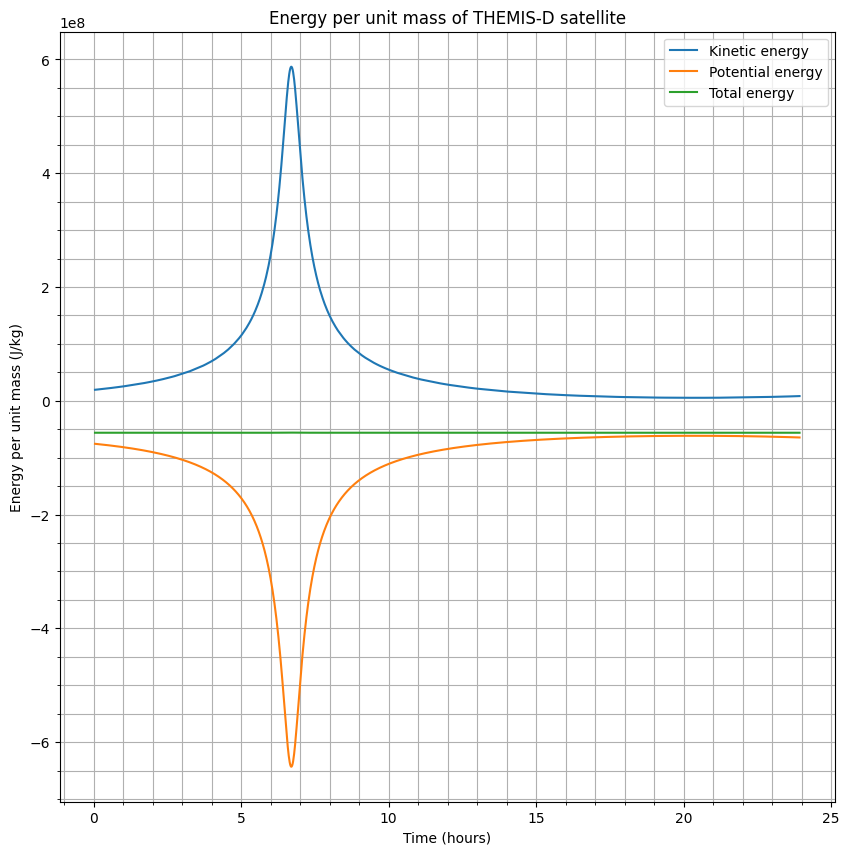

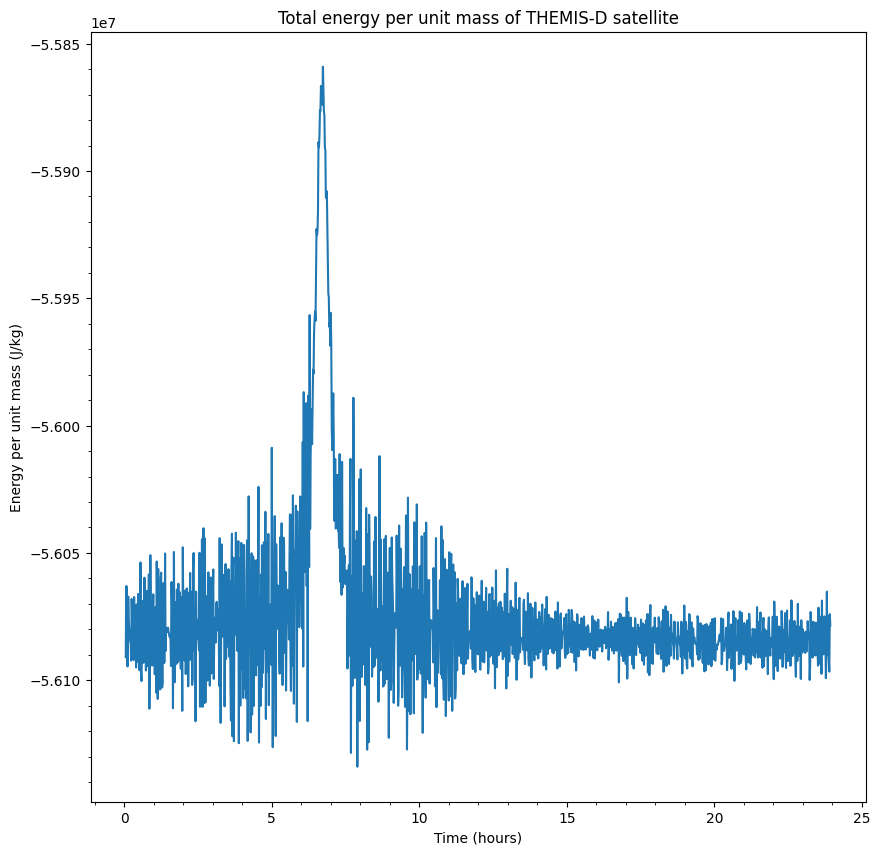

In [52]:
def calculate_PE_two_term(x_series, y_series, z_series):
    '''
    Calculate the potential energy per unit mass of the satellite as a function of time, given series of x, y and z positions. Uses a more accurate gravitational potential model including two terms. Returns an array of potential energy values in J/kg.
    '''

    # define constants:

    mu = 3.98600440e14 #m^3/s^2
    J2 = 1.75553e25 #m^5/s^2

    # convert constants to units of km^3/hr^2
    mu = mu * 1e-9 * 3600**2
    J2 = J2 * 1e-18 * 3600**2

    # Calculate the radial distance of the satellite from the center of the earth (i.e. the origin)
    r_series = np.sqrt(x_series**2 + y_series**2 + z_series**2)

    phi = (-mu/r_series) + (J2/(2*r_series**5))*(3*z_series**2 - r_series**2)


    return phi


def q4_plots(x_series, y_series, z_series, t_series):
    '''
    Create the plots required for question 4: total energy with a 7-point stencil and a 2-term gravitational field model.
    '''

    # Calculate the velocity of the satellite in kilometers per hour using 7-point central finite difference method
    v_series_7 = np.sqrt(finite_central_difference_seven(x_series,t_series,h)**2 + finite_central_difference_seven(y_series,t_series,h)**2 + finite_central_difference_seven(z_series,t_series,h)**2)

    # calculate the kinetic energy per unit mass using that velocity
    kinetic_energy = calculate_kinetic_energy(v_series_7)

    # calculate the potential energy per unit mass with our new function
    potential_energy = calculate_PE_two_term(x_series, y_series, z_series)

    # resize the potential energy array to match the kinetic energy array
    potential_energy = potential_energy[3:-3]

    # calculate the total energy per unit mass
    total_energy = kinetic_energy + potential_energy

    # resize the time data array to match the energy arrays

    t_series = t_series[3:-3]

    # plot the kinetic, potential, and total energy per unit mass as a function of time on one plot
    fig, ax = plt.subplots(figsize=(10,10))
    ax.plot(t_series, kinetic_energy, label='Kinetic energy')
    ax.plot(t_series, potential_energy, label='Potential energy')
    ax.plot(t_series, total_energy, label='Total energy')

    ax.set_xlabel('Time (hours)')
    ax.set_ylabel('Energy per unit mass (J/kg)')
    ax.set_title('Energy per unit mass of THEMIS-D satellite')
    ax.legend()
    ax.grid(True, which='both')
    ax.minorticks_on()
    plt.show()

    # plot the total energy as a function of time on its own plot
    fig, ax = plt.subplots(figsize=(10,10))
    ax.plot(t_series, total_energy, label='Total energy')

    ax.set_xlabel('Time (hours)')
    ax.set_ylabel('Energy per unit mass (J/kg)')
    ax.set_title('Total energy per unit mass of THEMIS-D satellite')
    ax.minorticks_on()

    plt.show()

    

q4_plots(x_series_km, y_series_km, z_series_km, t_series)

The conservation of energy appears to be upheld in this plot. The trend seen in the previous question continues - the overall accuracy of the approximation increased, but the noise was again amplified.

---------

## Conclusions

In this assignment, numerical differentiation techniques were explored in the context of orbital mechanics. Data was collected from the THEMIS-D satellite, and the kinetic, potential, and total energy of the satellite was plotted as a function of time. The total energy was not conserved, as the numerical differentiation of the position data resulted in a small discontinuity at the perigee. This was improved by using a higher-order approximation, and the 7-point central finite difference scheme was found to be the most accurate. The total energy was conserved to a greater degree when a two-term model for the gravitational potential energy was used.

